In [89]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [90]:
import cv2


In [91]:
data_path=r"C:\Users\dell\Documents\Mast_ML\dataset" 
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))
print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [93]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

#load_image load the image path ,
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from sklearn.preprocessing import LabelBinarizer # one-hot encoding 
from tensorflow.keras.utils import to_categorical

data=[] #to store images ie training datasets input
labels=[] #to store lables ie testing datasets output

for category in categories:
    folder_path=os.path.join(data_path,category)  #loading folders of datasets is ['with mask', 'without mask']
    img_names=os.listdir(folder_path) # store all the image names in the list 
    
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name) # path of each image
        image=load_img(img_path,target_size=(224,224))
        image=img_to_array(image)
        image=preprocess_input(image) # from mobile net v2
        
        #once we converts our image into array and then preprocessed , append image to data list and its category in lables
        data.append(image)
        labels.append(category) # since we already have binary values for the lable lets use the same
        # we can aslo use the one-hot encoding on the lable to get the binary form to lables
        
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)
    
        # below code is to convert the color to gray but now lets use color only 
#         try:
#             gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) # conver the image from rgb to gray scale
#             resized=cv2.resize(gray,(img_size,img_size)) #size into 100 * 100
#             data.append(resized) # actual data here ie resized image to train the machine
#             labels.append(label_dict[category]) # output is 0 or 1 depends on category with or without mask {'with mask': 0, 'without mask': 1}
#         except Exception as e:
#             print("Exception !!! ",e)


# now we have the dta and labels list. To work with deep learning model, we need to convert it into np array
data=np.array(data,dtype='float32')
labels=np.array(labels)

In [94]:
#lets split the np array into test and train data
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(data,labels,
                                           test_size=0.20,stratify=labels,random_state=42)

In [95]:
#construction of training image generator for data augmentation
# data augmenetation means its takes each imoji and produces its rotated ,zoomed or other angle clips

from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug=ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [96]:
#PREPROCESSING IS DONE HERE

In [97]:
#MODELING PART
# NEXT WE GONNA USE MOBILENETV2 WHICH IS A NEURAL NETWORK BUT BETTER THAN
#CONVOLUTIONAL NEURAL NETWORK CZ ITS FASTER AND LIGHT WEIGHT AND CAN INTEGRETE INTO APPS
 


In [98]:
from tensorflow.keras.applications import MobileNetV2

INIT_LR=1e-4 
# initioan learning rate=e^4 its 0.0001, keep it less so loss will be less ,better accuracy

#Epochs is the numbers of times the datasets have to be passed. means how many times the machine should learn
EPOCHS=20

BS=32 # batch size at each epochs


In [99]:
from tensorflow.keras.layers import AveragePooling2D,Dropout,Flatten,Dense,Input

#A first model thats base model which is a mobilenet model which takes 3 parms
#weights we pass imagenet, which is a pretrained model specically for the images 
#by default wights is initialized to NONE
# include_top is to select fully connected layer(false), or top connected layer(true)
#by default is True

#input_tensor= which the size and color of the image (224*224) and RGB(3)
baseModel=MobileNetV2(weights='imagenet',include_top=False,
                     input_tensor=Input(shape=(224,224,3)))


C:\Users\dell\Anaconda3\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [100]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

block_4_project_BN (BatchNormal (None, 28, 28, 32)   128         block_4_project[0][0]            
__________________________________________________________________________________________________
block_4_add (Add)               (None, 28, 28, 32)   0           block_3_project_BN[0][0]         
                                                                 block_4_project_BN[0][0]         
__________________________________________________________________________________________________
block_5_expand (Conv2D)         (None, 28, 28, 192)  6144        block_4_add[0][0]                
__________________________________________________________________________________________________
block_5_expand_BN (BatchNormali (None, 28, 28, 192)  768         block_5_expand[0][0]             
__________________________________________________________________________________________________
block_5_expand_relu (ReLU)      (None, 28, 28, 192)  0           block_5_expand_BN[0][0]          
__________

block_9_expand_relu (ReLU)      (None, 14, 14, 384)  0           block_9_expand_BN[0][0]          
__________________________________________________________________________________________________
block_9_depthwise (DepthwiseCon (None, 14, 14, 384)  3456        block_9_expand_relu[0][0]        
__________________________________________________________________________________________________
block_9_depthwise_BN (BatchNorm (None, 14, 14, 384)  1536        block_9_depthwise[0][0]          
__________________________________________________________________________________________________
block_9_depthwise_relu (ReLU)   (None, 14, 14, 384)  0           block_9_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_9_project (Conv2D)        (None, 14, 14, 64)   24576       block_9_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_9_pr

block_14_expand (Conv2D)        (None, 7, 7, 960)    153600      block_13_project_BN[0][0]        
__________________________________________________________________________________________________
block_14_expand_BN (BatchNormal (None, 7, 7, 960)    3840        block_14_expand[0][0]            
__________________________________________________________________________________________________
block_14_expand_relu (ReLU)     (None, 7, 7, 960)    0           block_14_expand_BN[0][0]         
__________________________________________________________________________________________________
block_14_depthwise (DepthwiseCo (None, 7, 7, 960)    8640        block_14_expand_relu[0][0]       
__________________________________________________________________________________________________
block_14_depthwise_BN (BatchNor (None, 7, 7, 960)    3840        block_14_depthwise[0][0]         
__________________________________________________________________________________________________
block_14_d

In [101]:
#Now the next layer say headmodel, which takes the output of basemodel as input 
headModel=baseModel.output

#do the average pooling for the headmodel
headModel=AveragePooling2D(pool_size=(7,7))(headModel)

#Flatten the last but one layer into a stack
headModel=Flatten(name="flatten")(headModel)

#Dense is the final layer which has only 2 neurons, mask n without mask
#Relu acts as a goto fuction so its better for image
headModel=Dense(128,activation="relu")(headModel)

#to reduce the overfitting
headModel=Dropout(0.5)(headModel)

#since we are dealing with binary ops layers, sigmoid or softmax is better
headModel=Dense(2,activation="softmax")(headModel)


In [102]:
#The actual model which will train is below 
#Place the head FC model on top of the base model

from tensorflow.keras.models import Model
model=Model(inputs=baseModel.input,outputs=headModel)

In [103]:
import tensorflow
print(tensorflow.keras.__version__)

2.2.4-tf


In [104]:
#Now loop over the all layers in the base model and freeze them so they will 
#not be update during the first training process
#Just freezing for training
for layer in baseModel.layers:
    layer.trainable=False

In [105]:
#compile our model
#binary_crossentrpy is a loss function which helps the neural network know how far off it is
#and then it utilizeer the optimizer properly
#here we gonna use the adam optimizer 

#and also trace the accuracy matrics

from tensorflow.keras.optimizers import Adam
opt=Adam(lr=INIT_LR,decay=INIT_LR/EPOCHS)

model.compile(loss="binary_crossentropy",optimizer=opt,metrics=['accuracy'])


In [106]:
#now train the head of the model
# i.e, fittiing the data into model
#here we gonna flow the augmented imggenerateor also to get more accuaracy

H=model.fit(
    aug.flow(trainX[1:],trainY[1:],batch_size=BS),
    steps_per_epoch=len(trainX)//BS,
    validation_data=(testX,testY),
    validation_steps=len(testX)//BS,
    epochs=EPOCHS)

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
34/34 [==============================] - 924s 27s/step - loss: 0.6083 - acc: 0.6795 - val_loss: 0.2341 - val_acc: 0.9457
Epoch 2/20
34/34 [==============================] - 320s 9s/step - loss: 0.3673 - acc: 0.8341 - val_loss: 0.1317 - val_acc: 0.9710
Epoch 3/20
34/34 [==============================] - 315s 9s/step - loss: 0.2742 - acc: 0.8941 - val_loss: 0.0984 - val_acc: 0.9855
Epoch 4/20
34/34 [==============================] - 249s 7s/step - loss: 0.2438 - acc: 0.9082 - val_loss: 0.0827 - val_acc: 0.9855
Epoch 5/20
34/34 [==============================] - 257s 8s/step - loss: 0.1964 - acc: 0.9166 - val_loss: 0.0652 - val_acc: 0.9819
Epoch 6/20
34/34 [==============================] - 211s 6s/step - loss: 0.1577 - acc: 0.9458 - val_loss: 0.0574 - val_acc: 0.9928
Epoch 7/20
34/34 [==============================] - 413s 12s/step - loss: 0.1730 - acc: 0.9340 - val_loss: 0.0537 - val

In [108]:
predIdxs=model.predict(testX,batch_size=BS) # predictions on testing set
#for each image in the testing set we need to find the index of the label with
#corresponding largest predicted probalility
predIdxs=np.argmax(predIdxs,axis=1)

In [111]:
#report nicely formatted one
from sklearn.metrics import classification_report
print(classification_report(testY.argmax(axis=1),predIdxs,
                           target_names=lb.classes_))

              precision    recall  f1-score   support

   with mask       0.98      1.00      0.99       138
without mask       1.00      0.98      0.99       138

    accuracy                           0.99       276
   macro avg       0.99      0.99      0.99       276
weighted avg       0.99      0.99      0.99       276



In [112]:
#save the model to disk
model.save('mask_detector.model',save_format="f5")

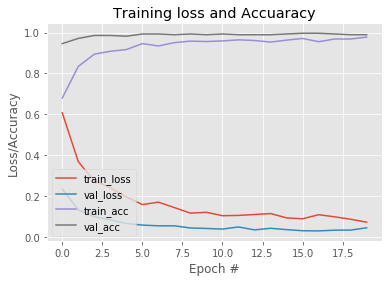

In [114]:
#ploteed grapgh based on the traiining done

N=EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,N),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,N),H.history["val_loss"],label="val_loss")
plt.plot(np.arange(0,N),H.history["acc"],label="train_acc")
plt.plot(np.arange(0,N),H.history["val_acc"],label="val_acc")
plt.title("Training loss and Accuaracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("Loss_acc_plot.png")
plt.show()